**Importação do DF que serve de base no PNCP e respectivos valores a cada ano**

In [2]:
import pandas as pd
import requests
import os  
import numpy as np
import plotly.express as px



In [167]:
from analises import bibl_grafico

In [67]:
df_calc_totais=pd.read_csv('./dadosPNCP_completo_tratado.csv',low_memory=False)

#transforma a coluna de cod de municípios para string e assimpoder fazer join com tabela de população
df_calc_totais['unidadeOrgao_codigoIbge']=df_calc_totais['unidadeOrgao_codigoIbge'].astype(str)
df_calc_totais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215111 entries, 0 to 215110
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   numeroControlePncpCompra     215111 non-null  object 
 1   codigoPaisFornecedor         206744 non-null  object 
 2   dataPublicacaoPncp           215111 non-null  object 
 3   dataAtualizacao              215111 non-null  object 
 4   anoContrato                  215111 non-null  int64  
 5   numeroContratoEmpenho        215111 non-null  object 
 6   dataAssinatura               215111 non-null  object 
 7   dataVigenciaInicio           215111 non-null  object 
 8   dataVigenciaFim              215111 non-null  object 
 9   niFornecedor                 215111 non-null  object 
 10  tipoPessoa                   215111 non-null  object 
 11  sequencialContrato           215111 non-null  int64  
 12  nomeRazaoSocialFornecedor    214653 non-null  object 
 13 

In [68]:
#estudo de adesão de publicação
df_estudo_publ=df_calc_totais.query("usuarioNome!='Compras.gov.br'")
df_estudo_publ.to_csv("publicador.csv")

**Tratamento da tabela de Prévia do Censo 2022**



In [6]:
#transformação em df da planilha de população do IBGE
df_popul=pd.read_csv('.\POP_DOU_2023_Municipios_POP2022_Malha2023.csv', delimiter= ';')


In [7]:
#adaptação da coluna cod. mun para numerico inteiro e posterior inserção de dígitos compatíveis com o formato da coluna de códigos IBGE do arquivo do PNCP 
df_popul['COD_MUNIC_NUM']=pd.to_numeric(df_popul['COD. MUNIC'], errors='coerce')

#df_popul.info()

def padronizar_digito_inteiro(valor, digitos=5):
    return f"{valor:0{digitos}d}"

df_popul['COD_MUNIC_NUM'] = df_popul['COD_MUNIC_NUM'].apply(lambda x: padronizar_digito_inteiro(x, digitos=5))

df_popul['cod_mun_corr']=df_popul['COD. UF'].astype(str)+df_popul['COD_MUNIC_NUM'].astype(str)

df_popul.rename(columns={" POPULAÇÃO ":"populacao"},inplace=True) #limpeza feita antes do join

df_popul['populacao']=df_popul['populacao'].str.replace('.','') #limpeza feita antes do join

df_popul['populacao']=df_popul['populacao'].astype('int64')
df_popul['ente_obrigado']=(df_popul['populacao']>20000)


In [8]:
df_popul=df_popul.drop(columns=['COD. UF','COD. MUNIC','COD_MUNIC_NUM'])
df_popul

,UF,NOME DO MUNICÍPIO,populacao,cod_mun_corr,ente_obrigado
0,RO,Alta Floresta D'Oeste,21494,1100015,True
1,RO,Ariquemes,96833,1100023,True
2,RO,Cabixi,5351,1100031,False
3,RO,Cacoal,86887,1100049,True
4,RO,Cerejeiras,15890,1100056,False
...,...,...,...,...,...
5565,GO,Vianópolis,14956,5222005,False
5566,GO,Vicentinópolis,8768,5222054,False
5567,GO,Vila Boa,4215,5222203,False
5568,GO,Vila Propício,5815,5222302,False


In [9]:
#inner join entre DF principal e tabela da prévia de censo do IBGE

df_calc_totais_com_pop=pd.merge(df_calc_totais,df_popul,left_on='unidadeOrgao_codigoIbge', right_on='cod_mun_corr',how='inner')

#apaga colunas indesejadas após junção
df_calc_totais_com_pop=df_calc_totais_com_pop.drop(columns=['numeroControlePncpCompra', 'codigoPaisFornecedor',
       'dataAtualizacao','numeroContratoEmpenho', 'dataAssinatura', 'dataVigenciaInicio',
       'dataVigenciaFim','sequencialContrato','niFornecedorSubContratado','nomeFornecedorSubContratado', 'informacaoComplementar', 'processo',
       'unidadeSubRogada', 'orgaoSubRogado','receita',
       'tipoPessoaSubContratada','valorInicial',
       'numeroParcelas', 'valorParcela','valorAcumulado',
       'numeroRetificacao', 'identificadorCipi', 'urlCipi', 
       'tipoContrato_id', 'tipoContrato_nome','NOME DO MUNICÍPIO','niFornecedorSubContratado'])

df_calc_totais_com_pop.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215111 entries, 0 to 215110
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dataPublicacaoPncp          215111 non-null  object 
 1   anoContrato                 215111 non-null  int64  
 2   niFornecedor                215111 non-null  object 
 3   tipoPessoa                  215111 non-null  object 
 4   nomeRazaoSocialFornecedor   214653 non-null  object 
 5   numeroControlePNCP          215111 non-null  object 
 6   objetoContrato              215111 non-null  object 
 7   valorGlobal                 215111 non-null  float64
 8   usuarioNome                 215111 non-null  object 
 9   categoriaProcesso_id        215111 non-null  int64  
 10  categoriaProcesso_nome      215111 non-null  object 
 11  orgaoEntidade_cnpj          215111 non-null  int64  
 12  orgaoEntidade_razaoSocial   215111 non-null  object 
 13  orgaoEntidade_

In [10]:
#cáluclo de num de mun em cada UF segund IBGE
df_qtde_mun_uf=pd.DataFrame(df_popul.groupby(['UF'])['NOME DO MUNICÍPIO'].count()).reset_index()

df_qtde_mun_uf.columns=['UF','Qtde municípios na UF']

df_qtde_mun_uf

#análises municipais não podem incluir a cidade de Bsb, portanto o dataframe de comparação deve excluir a UF relativa ao Distrito Federal
df_qtde_mun_uf_semDF=df_qtde_mun_uf.query("UF!='DF'")
df_qtde_mun_uf_semDF.count()


UF                       26
Qtde municípios na UF    26
dtype: int64

**Leituras Gerais**

In [11]:
#calcula total de linhas no arquivo, ou seja, o total de envios
quantidade_de_ocorr_em_contratos=len(df_calc_totais_com_pop)
quantidade_de_ocorr_em_contratos

215111

In [12]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO
#cria df para apresentacao de percentuais de representatividade de envio
distribuicao=df_calc_totais_com_pop.groupby(['orgaoEntidade_esferaId'])['numeroControlePNCP'].count()

df_distribuicao=pd.DataFrame(distribuicao)
df_distribuicao['Repres percentual']=((df_distribuicao/quantidade_de_ocorr_em_contratos)*100)
#df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"Qtde_envios","orgaoEntidade_esferaId:},inplace=True)


df_distribuicao.sort_values(by='Repres percentual', ascending=False)
#df_distribuicao
df_distribuicao.reset_index(inplace=True)
df_distribuicao.rename(columns={"orgaoEntidade_esferaId":"Esfera Federativa","numeroControlePNCP":"Qtde contratos enviados"},inplace=True)


#
esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}



df_distribuicao['Esfera Federativa']=df_distribuicao['Esfera Federativa'].map(esfera_def)
df_distribuicao.sort_values(by='Repres percentual', ascending=False, inplace=True)
df_distribuicao
#df_distribuicao=pd.DataFrame(distribuicao)
#df_distribuicao.reset_index()
#df_distribuicao.columns=['Esfera','Qtde envios']



,Esfera Federativa,Qtde contratos enviados,Repres percentual
2,Federal,108749,50.554830
3,Municipal,96046,44.649507
1,Estadual,9870,4.588329
4,Não se aplica,321,0.149225
0,Distrital,125,0.058110


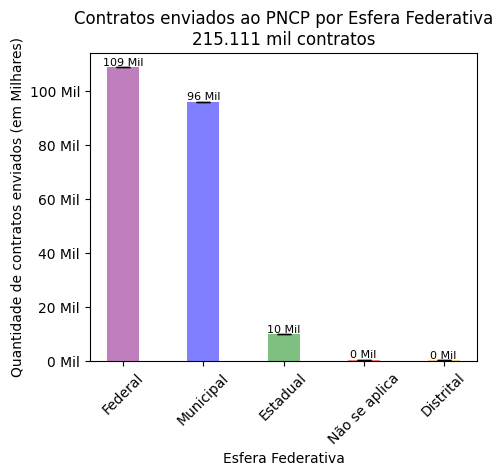

In [13]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO - GRÁFICO

#não apagar 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Configuração de cores personalizadas
cores_esferas = {
    "Distrital": "#bebada",
    "Estadual": "#80b1d3" , 
    "Federal": "#8dd3c7",    
    "Municipal": "#fb8072",    
    "Não se aplica": "#fdb462"
}

# Suponha que você tenha um DataFrame chamado 'df_distribuicao' com as colunas 'Esfera Federativa' e 'Nº contratos enviados'

# Configuração das barras de erro (opcional)
erros = [0.2] * len(df_distribuicao['Esfera Federativa'])

# Configuração de cores personalizadas
cores = ['purple', 'blue', 'green', 'red', 'orange']

# Largura personalizada das barras
largura_barras = 0.4

# Criando o gráfico de barras
plt.figure(figsize=(5, 4))
bars = plt.bar(df_distribuicao['Esfera Federativa'], df_distribuicao["Qtde contratos enviados"], alpha=0.5, color=cores, width=largura_barras, yerr=erros, capsize=5)


# Definindo rótulos dos eixos e título
plt.xlabel('Esfera Federativa')
plt.title(f'Contratos enviados ao PNCP por Esfera Federativa\n{quantidade_de_ocorr_em_contratos/1000} mil contratos')

# Personalizando rótulos do eixo x
plt.xticks(df_distribuicao['Esfera Federativa'], rotation=45)

# Formatando os rótulos do eixo y em milhares
def milhares_formatter(x, pos):
    return f'{x / 1000:.0f} Mil'

# Aplicando o formatador ao eixo y
formatter = FuncFormatter(milhares_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Definindo rótulo do eixo y
plt.ylabel('Quantidade de contratos enviados (em Milhares)')

# Formatando as etiquetas das barras para milhares
def milhares_bar_formatter(label, pos):
    return f'{label / 1000:.0f} Mil'

#Inserindo os rótulos
for bar, label in zip(bars, df_distribuicao['Qtde contratos enviados']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, milhares_bar_formatter(label, None), ha='center', va='bottom', fontsize=8)

# Exibindo o gráfico
plt.show()

Text(0.5, 1.0, 'Contratos enviados ao PNCP por Esfera Federativa')

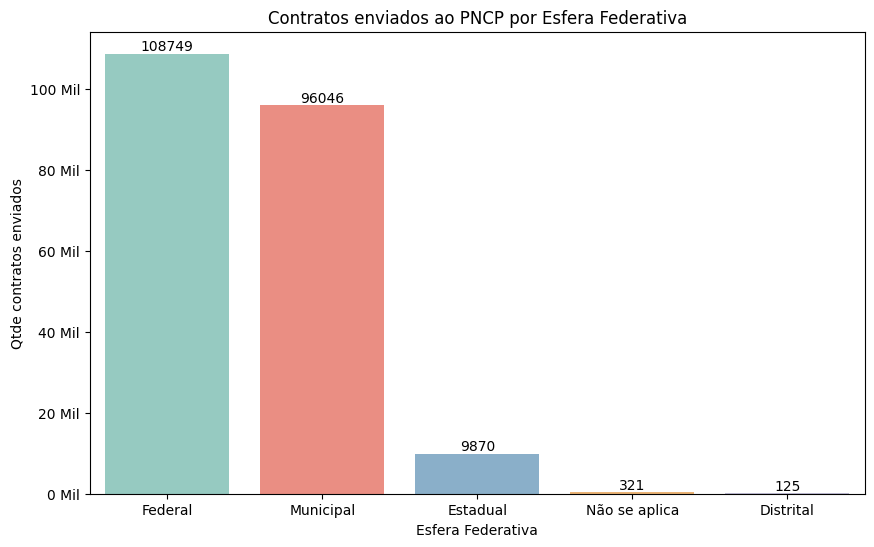

In [14]:
#ANALISE - QTDE E REPRESENTATIVIDADE DE ENVIO - GRÁFICO AJUDA COM CORES FÁBIO 

from analises import bibl_grafico
import matplotlib.pyplot as plt
#from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd


# Criando o gráfico de barras


fig_handle = plt.figure(figsize=(10, 6))

ax = sns.barplot(df_distribuicao,
            x = 'Esfera Federativa',
            y = 'Qtde contratos enviados',
            hue = 'Esfera Federativa',
            palette = cores_esferas)


for i in range(len(ax.containers)):    
    ax.bar_label(ax.containers[i], fontsize=10);

# Formatando os rótulos do eixo y em milhares
def milhares_formatter(x, pos):
    return f'{x / 1000:.0f} Mil'

# Aplicando o formatador ao eixo y
formatter = FuncFormatter(milhares_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Definindo rótulos dos eixos e título
plt.xlabel('Esfera Federativa')
plt.title(f'Contratos enviados ao PNCP por Esfera Federativa')#nTotal de {quantidade_de_ocorr_em_contratos/1000} mil contratos')

#Inserindo os rótulos
#for bar, label in zip(bars, df_distribuicao['Qtde contratos enviados']):
#    height = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width() / 2, height, milhares_bar_formatter(label, None), ha='center', va='bottom', fontsize=8)

#bibl_grafico.save_data_matplotlib(fig_handle, 'adesao_visao_geral')

#bibl_grafico.save_data(fig, 'adesao_barra_distribuicaoesfera')
    
#formatter = FuncFormatter(milhares_formatter)
#ax.yaxis.set_major_formatter(formatter)

In [15]:
# Preparação para contagem de responsáveis por envio - para esfera Federal, contagem de Código de Unidades (UG); para esfera mun, estd e dist, contagem de CNPJ
df_contagem_UG_interm1=pd.DataFrame(df_calc_totais_com_pop.groupby(['anoContrato','orgaoEntidade_esferaId'])['unidadeOrgao_codigoUnidade'].nunique()).reset_index()
df_contagem_UG_interm1=df_contagem_UG_interm1.set_index('orgaoEntidade_esferaId')
df_contagem_UG_interm1=df_contagem_UG_interm1.loc['F'].reset_index()
df_contagem_UG_interm1.columns=('Esfera Federativa','Ano','Qtde de órgãos aderentes')
#df_contagem_UG_interm1.info()

df_contagem_CNPJ_interm1=pd.DataFrame(df_calc_totais_com_pop.groupby(['anoContrato','orgaoEntidade_esferaId'])['orgaoEntidade_cnpj'].nunique()).reset_index()
df_contagem_CNPJ_interm1=df_contagem_CNPJ_interm1.set_index('orgaoEntidade_esferaId')
df_contagem_CNPJ_interm1=df_contagem_CNPJ_interm1.drop('F').reset_index()
df_contagem_CNPJ_interm1.columns=('Esfera Federativa','Ano','Qtde de órgãos aderentes')


#Frame de contagem por aderentes em cada esfera, por ano
df_contagem_responsaveis=pd.concat([df_contagem_UG_interm1,df_contagem_CNPJ_interm1])
df_contagem_responsaveis=df_contagem_responsaveis[['Ano','Esfera Federativa', 'Qtde de órgãos aderentes']]
df_contagem_responsaveis.sort_values(by=['Ano','Esfera Federativa'],ascending=[True,True])



esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}

df_contagem_responsaveis['Esfera Federativa']=df_contagem_responsaveis['Esfera Federativa'].map(esfera_def)

df_contagem_responsaveis.query("Ano == 2021 | Ano == 2022 | Ano == 2023")


,Ano,Esfera Federativa,Qtde de órgãos aderentes
0,2021,Federal,703
1,2022,Federal,1586
2,2023,Federal,2160
0,2021,Distrital,1
1,2021,Estadual,15
2,2021,Municipal,10
3,2022,Distrital,1
4,2022,Estadual,41
5,2022,Municipal,184
6,2022,Não se aplica,1


In [16]:
#atribuição da contagem por agrupamento por ano, esfera e num de entidades aderentes

agg_panorama_ano=pd.DataFrame(df_calc_totais.groupby(['anoContrato','orgaoEntidade_esferaId'])['numeroControlePNCP'].count())
agg_panorama_ano=agg_panorama_ano.reset_index()


esfera_def={'F':'Federal', 'M':'Municipal', 'E':'Estadual', 'N':'Não se aplica','D':'Distrital'}



agg_panorama_ano.rename(columns={"anoContrato":"Ano","orgaoEntidade_esferaId":"Esfera Federativa","numeroControlePNCP":"Qtde contratos enviados"},inplace=True)

agg_panorama_ano['Esfera Federativa']=agg_panorama_ano['Esfera Federativa'].map(esfera_def)
agg_panorama_ano = agg_panorama_ano .query("Ano == 2021 | Ano == 2022 | Ano == 2023")
linhas_a_remover = agg_panorama_ano[agg_panorama_ano['Esfera Federativa'] == 'Não se aplica'].index

#agg_panorama_ano = agg_panorama_ano.drop(linhas_a_remover)
#agg_panorama_ano

In [17]:
#juntando as tabelas e calculando a proporção entre contratos enviados e órgãos aderentes

join_agg_pan_ano_df_cont=pd.merge(agg_panorama_ano, df_contagem_responsaveis ,left_on=('Ano','Esfera Federativa'), right_on=('Ano','Esfera Federativa'),how='left')
join_agg_pan_ano_df_cont['Razão de envios']=(join_agg_pan_ano_df_cont['Qtde contratos enviados']/join_agg_pan_ano_df_cont['Qtde de órgãos aderentes'])
join_agg_pan_ano_df_cont




,Ano,Esfera Federativa,Qtde contratos enviados,Qtde de órgãos aderentes,Razão de envios
0,2021,Distrital,13,1,13.000000
1,2021,Estadual,45,15,3.000000
2,2021,Federal,5219,703,7.423898
3,2021,Municipal,167,10,16.700000
4,2022,Distrital,33,1,33.000000
5,2022,Estadual,2162,41,52.731707
6,2022,Federal,38171,1586,24.067465
7,2022,Municipal,2308,184,12.543478
8,2022,Não se aplica,2,1,2.000000
9,2023,Distrital,79,3,26.333333


In [18]:
#Fabio
dados_agrupados = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                  )
dados_agrupados

Esfera Federativa,Distrital,Estadual,Federal,Municipal,Não se aplica
Ano,,,,,
2021,13.0,45.0,5219.0,167.0,NaN
2022,33.0,2162.0,38171.0,2308.0,2.0
2023,79.0,7663.0,65356.0,93567.0,319.0


In [19]:
#fabio
heights_2023.iloc[:, 0]

NameError: name 'heights_2023' is not defined

In [20]:
#fabio
anos_heights = dados_agrupados.cumsum(axis = 1).fillna(0)
anos_heights.insert(0, column = 'base', value = 0)
anos_heights = anos_heights.T.rolling(2).mean().T.drop("base", axis = 1)
heights_2023 = anos_heights.query("Ano == 2023")
heights_2023.iloc[:, 0] = heights_2023.iloc[:, 0] * -1

In [21]:
heights_2022 = anos_heights.query("Ano == 2022")
heights_2022.iloc[:, 0] = heights_2022.iloc[:, 0] #* -1
heights_2022

Esfera Federativa,Distrital,Estadual,Federal,Municipal,Não se aplica
Ano,,,,,
2022,16.5,1114.0,21280.5,41520.0,42675.0


In [22]:
heights_2021 = anos_heights.query("Ano == 2021")
heights_2021.iloc[:, 0] = heights_2021.iloc[:, 0] * -1
heights_2021

Esfera Federativa,Distrital,Estadual,Federal,Municipal,Não se aplica
Ano,,,,,
2021,-6.5,35.5,2667.5,5360.5,2722.0


In [23]:
#fabio
dados_orgaos = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                   .query("Ano == 2023")                
                  )

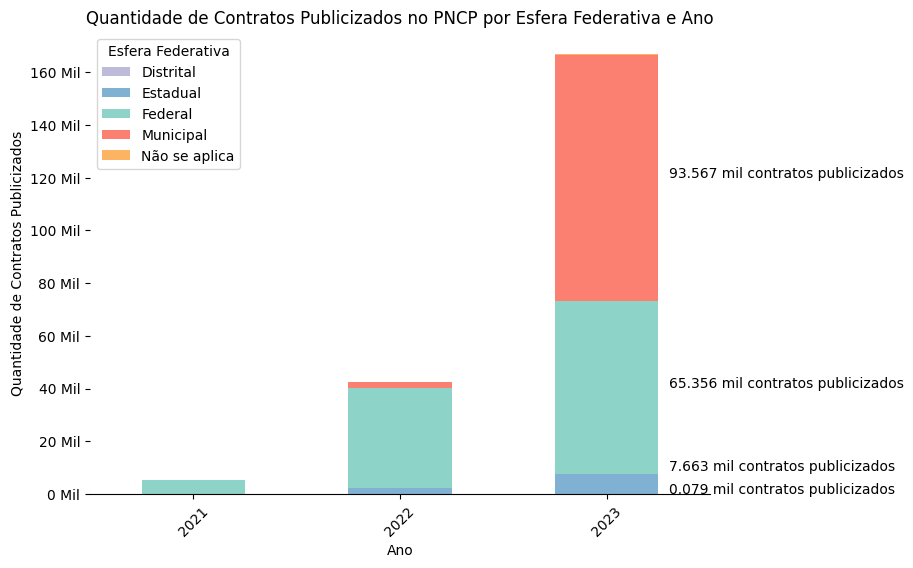

In [27]:
#Fábio
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#fig_handle = plt.figure(figsize=(10, 6))

dados_agrupados = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                  )

anos_heights = dados_agrupados.cumsum(axis = 1).fillna(0)
anos_heights.insert(0, column = 'base', value = 0)
anos_heights = anos_heights.T.rolling(2).mean().T.drop("base", axis = 1)
heights_2023 = anos_heights.query("Ano == 2023")
heights_2023.iloc[:, 1] = heights_2023.iloc[:, 1] + 5000

quant_orgaos = (join_agg_pan_ano_df_cont
                .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                .sum()
                .unstack()
                .query("Ano == 2023")                
                )


ax = dados_agrupados.plot(kind='bar', 
                          stacked=True, 
                          figsize=(8,6), 
                          color = cores_esferas.values())


esferas = list(dados_agrupados.columns)[:-1]

for esfera in esferas:
    ax.annotate(text = f"{int(dados_orgaos[esfera].iloc[0])/1000} mil contratos publicizados",
             xy = (2.3, heights_2023[esfera].iloc[0]))


#Esfera{esfera}:



# Aplicando o formatador ao eixo y
formatter = FuncFormatter(milhares_formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Contratos Publicizados')
ax.set_title('Quantidade de Contratos Publicizados no PNCP por Esfera Federativa e Ano')
ax.legend(title='Esfera Federativa', loc='upper left', labels=dados_agrupados.columns)

plt.xticks(rotation=45);


ax.spines[["left", "right", "top"]].set_visible(False)

bibl_grafico.save_data_matplotlib(ax, 'adesao_visao_geral_por_ano_M2')


#teste de exibição do gráfico matplotlib
# Load figure from disk and display



In [28]:
import pickle
fig_handle = pickle.load(open('adesao_visao_geral_por_ano_M2.pkl','rb'))

fig_handle.show()



C:\Users\Administrador\AppData\Local\Temp\ipykernel_13852\3194817235.py:4: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



<Figure size 1000x600 with 0 Axes>

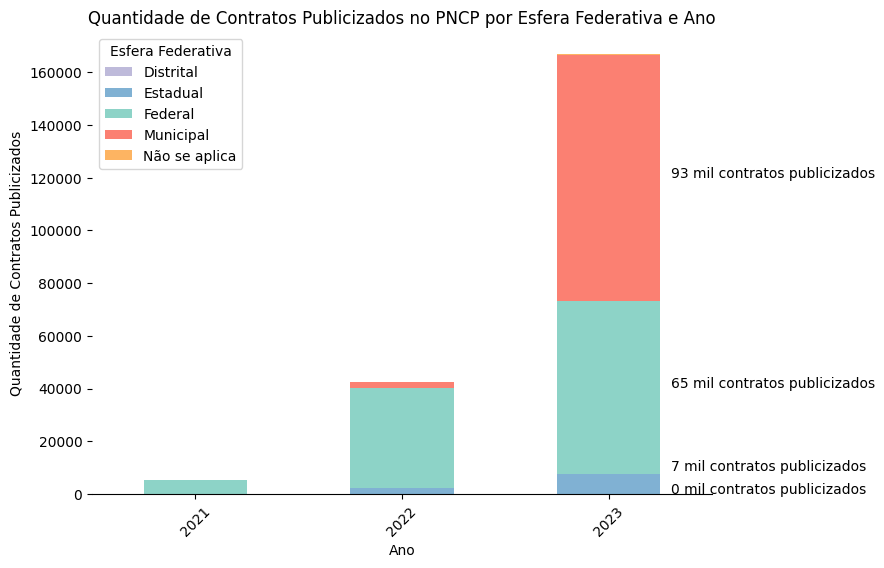

In [30]:
#Fábio2
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import pickle as pickle
 
#fig_handle = plt.figure(figsize=(10, 6))

dados_agrupados = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                  )

anos_heights = dados_agrupados.cumsum(axis = 1).fillna(0)
anos_heights.insert(0, column = 'base', value = 0)
anos_heights = anos_heights.T.rolling(2).mean().T.drop("base", axis = 1)
heights_2023 = anos_heights.query("Ano == 2023")
heights_2023.iloc[:, 1] = heights_2023.iloc[:, 1] + 5000

quant_orgaos = (join_agg_pan_ano_df_cont
                .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                .sum()
                .unstack()
                .query("Ano == 2023")                
                )


ax = dados_agrupados.plot(kind='bar', 
                          stacked=True, 
                          figsize=(8,6), 
                          color = cores_esferas.values())


esferas = list(dados_agrupados.columns)[:-1]

for esfera in esferas:
    ax.annotate(text = f"{int(dados_orgaos[esfera].iloc[0]/1000)} mil contratos publicizados",
             xy = (2.3, heights_2023[esfera].iloc[0]))


#Esfera{esfera}:



# Aplicando o formatador ao eixo y
#formatter = FuncFormatter(milhares_formatter)
#ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Contratos Publicizados')
ax.set_title('Quantidade de Contratos Publicizados no PNCP por Esfera Federativa e Ano')
ax.legend(title='Esfera Federativa', loc='upper left', labels=dados_agrupados.columns)

plt.xticks(rotation=45)


ax.spines[["left", "right", "top"]].set_visible(False)

#para gráficos no matplotlib
with open('./teste.pkl', 'wb') as pickle_file:
    pickle.dump(ax, pickle_file)


bibl_grafico.save_data_matplotlib(ax, 'adesao_visao_geral_por_ano_M2')

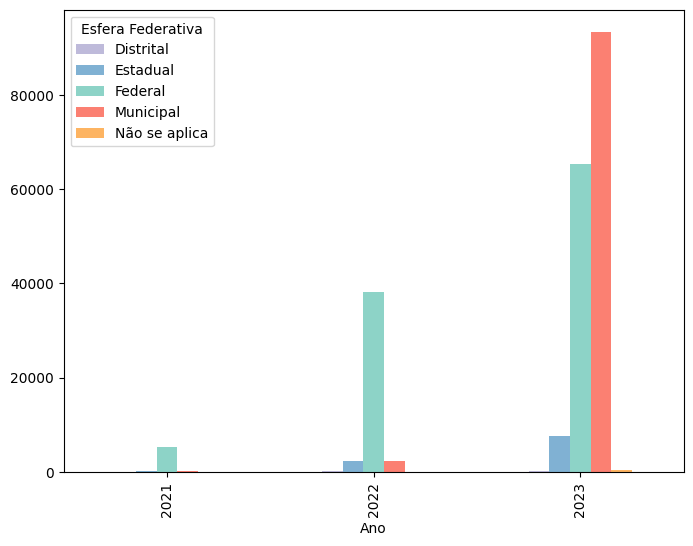

In [46]:
##fabio editei
ax = dados_agrupados.plot(kind='bar', 
                          #stacked=True, 
                          figsize=(8,6), 
                          color = cores_esferas.values())

In [47]:
#bard
import plotly.express as px
import pandas as pd

# Importando os dados
df_distribuicao = pd.DataFrame({
    "Esfera Federativa": ["Federal", "Estadual", "Municipal"],
    "Qtde contratos enviados": [10000, 20000, 30000]
})

# Criando o gráfico de barras
fig = px.bar(df_distribuicao, x="Esfera Federativa", y="Qtde contratos enviados")

# Formatando o gráfico
fig.update_layout(
    title="Contratos enviados ao PNCP por Esfera Federativa",
    xaxis_title="Esfera Federativa",
    yaxis_title="Quantidade de contratos (em milhares)",
    yaxis_tickformat=",.0f"
)

# Salvando o gráfico
fig.write_html("adesao_barra_distribuicaoesfera.html")

(array([0, 1, 2]),
 [Text(0, 0, '2021'), Text(1, 0, '2022'), Text(2, 0, '2023')])

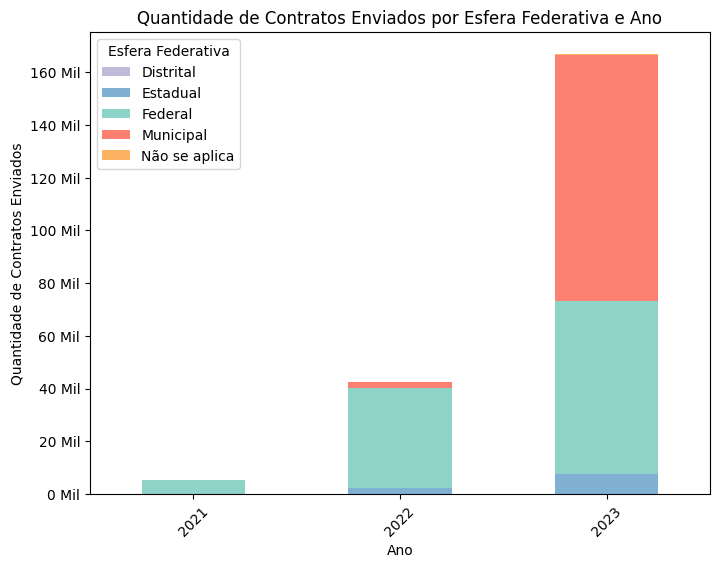

In [48]:
#ANÁLISE NÃO APAGAR NEM MEXER
import matplotlib.pyplot as plt
import pandas as pd

dados_agrupados = (join_agg_pan_ano_df_cont
                   .groupby(['Ano','Esfera Federativa'])['Qtde contratos enviados']
                   .sum()
                   .unstack()
                  )

ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(8,6), color = cores_esferas.values())

# Aplicando o formatador ao eixo y
formatter = FuncFormatter(milhares_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Contratos Enviados')
ax.set_title('Quantidade de Contratos Enviados por Esfera Federativa e Ano')
ax.legend(title='Esfera Federativa', loc='upper left', labels=dados_agrupados.columns)
plt.xticks(rotation=45)

#plt.bar(dados_agrupados['Ano'],dados_agrupados['Quantidade de Contratos Enviados'], bottom=0, label=dados_agrupados['Qtde de órgãos aderentes'])

#Inserindo os rótulos
#for bar, label in zip(bars, join_agg_pan_ano_df_cont['Qtde de órgãos aderentes']):
#    height = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width() / 2, height, milhares_bar_formatter(label, 'x'), ha='center', va='bottom', fontsize=8)
#


In [31]:
###NÃO ALTERAR - ANALISE - PUBLICAÇÕES NO PORTAL POR DATA EVOLUÇÃO DE USO

# reconhecendo a coluna de data de publicação como formato de data
#df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
#df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp']).agg({'numeroControlePNCP':'count'})['dataPublicacaoPncp'])
#df_envios_por_mes=df_envios_por_mes.reset_index()
##df_envios_por_mes.info()
#df_envios_por_mes.columns=('Ano/mês do envio','Qtde de contratos enviados')
#df_envios_por_mes

#df_calc_totais_com_pop
#[dataPublicacaoPncp]

#df_calc_totais_com_pop['dataPublicacaoPncp']=[df_calc_totais_com_pop['dataPublicacaoPncp']]

##df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp'].dt.to_period('M')).agg({'numeroControlePNCP':'count'})['dataPublicacaoPncp'])

#coversão da coluna de data de publicação para formato aaaa-mm
df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
df_calc_totais_com_pop['dataPublicacaoPncp']=df_calc_totais_com_pop['dataPublicacaoPncp'].dt.strftime('%Y-%m')

#dfatframe base pra ver usuário no tempo
df_envios_por_mes_usuario=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['usuarioNome']).agg({'numeroControlePNCP':'count'},{'dataPublicacaoPncp':'M'}))

#retorno ao gráfio de linhas, no 
df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp']).agg({'numeroControlePNCP':'count'},{'dataPublicacaoPncp':'M'}))

df_envios_por_mes=df_envios_por_mes.reset_index()

df_envios_por_mes.columns=('Ano-mês do envio','Qtde de contratos enviados')
df_envios_por_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ano-mês do envio            26 non-null     object
 1   Qtde de contratos enviados  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


In [32]:
##TENTATIVA#ANALISE - PUBLICAÇÕES NO PORTAL POR DATA EVOLUÇÃO DE USO


#coversão da coluna de data de publicação para formato aaaa-mm
df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
df_calc_totais_com_pop['dataPublicacaoPncp']=df_calc_totais_com_pop['dataPublicacaoPncp'].dt.strftime('%Y-%m')
df_calc_totais_com_pop.info()


C:\Users\Administrador\AppData\Local\Temp\ipykernel_13852\75547947.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215111 entries, 0 to 215110
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dataPublicacaoPncp          215111 non-null  object 
 1   anoContrato                 215111 non-null  int64  
 2   niFornecedor                215111 non-null  object 
 3   tipoPessoa                  215111 non-null  object 
 4   nomeRazaoSocialFornecedor   214653 non-null  object 
 5   numeroControlePNCP          215111 non-null  object 
 6   objetoContrato              215111 non-null  object 
 7   valorGlobal                 215111 non-null  float64
 8   usuarioNome                 215111 non-null  object 
 9   categoriaProcesso_id        215111 non-null  int64  
 10  categoriaProcesso_nome      215111 non-null  object 
 11  orgaoEntidade_cnpj          215111 non-null  int64  
 12  orgaoEntidade_razaoSocial   215111 non-null  object 
 13  orgaoEntidade_

In [172]:
# tentativa várias linhas para histórico de envios
#coversão da coluna de data de publicação para formato aaaa-mm
df_calc_totais_com_pop['dataPublicacaoPncp']=pd.to_datetime(df_calc_totais_com_pop['dataPublicacaoPncp'])
df_calc_totais_com_pop['dataPublicacaoPncp']=df_calc_totais_com_pop['dataPublicacaoPncp'].dt.strftime('%Y-%m')
df_envios_por_mes=pd.DataFrame(df_calc_totais_com_pop.groupby(df_calc_totais_com_pop['dataPublicacaoPncp']).agg({'numeroControlePNCP':'count'},{'dataPublicacaoPncp':'M'}))
df_envios_por_mes=df_envios_por_mes.reset_index()

#df_envios_por_mes.columns=('Ano-mês do envio','Qtde de contratos enviados')
#df_envios_por_mes.info()

df_envios_por_mes_variaslinhas=df_calc_totais_com_pop.groupby(['dataPublicacaoPncp','orgaoEntidade_esferaId']).agg({'numeroControlePNCP':'count'}).reset_index()
#df_calc_totais_com_pop.groupby(df_calc_totais_com_pop(['dataPublicacaoPncp'])).agg({'numeroControlePNCP':'count'},{'dataPublicacaoPncp':'M'})
df_envios_por_mes=df_envios_por_mes.reset_index()

df_envios_por_mes_variaslinhas
#df_envios_por_mes.columns=('Ano-mês do envio','Qtde de contratos enviados')




C:\Users\Administrador\AppData\Local\Temp\ipykernel_10496\288726189.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,dataPublicacaoPncp,orgaoEntidade_esferaId,numeroControlePNCP
0,2021-09,F,281
1,2021-10,F,1070
2,2021-10,M,1
3,2021-11,F,1440
4,2021-12,E,1
...,...,...,...
95,2023-10,D,24
96,2023-10,E,1051
97,2023-10,F,4042
98,2023-10,M,10474


In [53]:
df_envios_por_mes

,index,dataPublicacaoPncp,numeroControlePNCP
0,0,2021-09,281
1,1,2021-10,1071
2,2,2021-11,1440
3,3,2021-12,2225
4,4,2022-01,203
5,5,2022-02,536
6,6,2022-03,1072
7,7,2022-04,1881
8,8,2022-05,2393
9,9,2022-06,3539


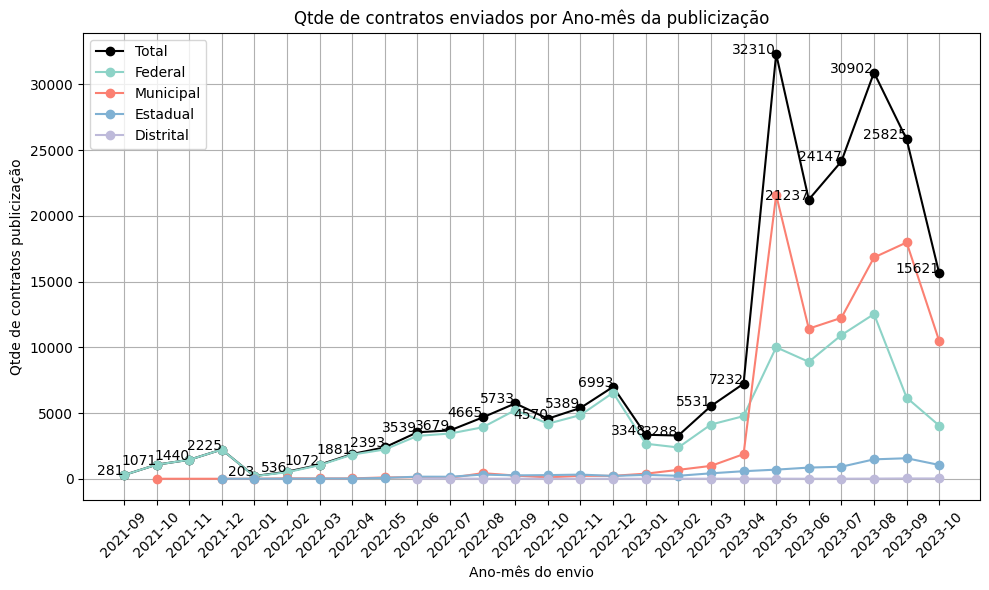

In [173]:
#TENTAIVA #NÃO ALTERAR -- ANALISE - Valores históricos do número de contratos por mês 

fig_handle = plt.figure(figsize=(10, 6))

#linha de totais
plt.plot(df_envios_por_mes["dataPublicacaoPncp"], df_envios_por_mes["numeroControlePNCP"], marker='o', color='black', label='Total')

# rótulos nos pontos
for i, txt in enumerate(df_envios_por_mes["numeroControlePNCP"]):
    plt.text(df_envios_por_mes["dataPublicacaoPncp"][i], df_envios_por_mes["numeroControlePNCP"][i], str(txt), ha='right')

#      "Distrital": "#bebada",
#    "Estadual": "#80b1d3" , 
#    "Federal": "#8dd3c7",    
#    "Municipal": "#fb8072", 

    
#linha federal
df_envios_por_mes_variaslinhas_F=df_envios_por_mes_variaslinhas.query("orgaoEntidade_esferaId=='F'")
plt.plot(df_envios_por_mes_variaslinhas_F["dataPublicacaoPncp"],df_envios_por_mes_variaslinhas_F["numeroControlePNCP"], marker='o', color='#8dd3c7', label='Federal')

#for i, txt in enumerate(df_envios_por_mes_variaslinhas_F["numeroControlePNCP"]):
#    plt.text(df_envios_por_mes_variaslinhas_F["dataPublicacaoPncp"][i], df_envios_por_mes_variaslinhas_F["numeroControlePNCP"][i], str(txt), ha='right')

#linha municipal
df_envios_por_mes_variaslinhas_M=df_envios_por_mes_variaslinhas.query("orgaoEntidade_esferaId=='M'")
plt.plot(df_envios_por_mes_variaslinhas_M["dataPublicacaoPncp"],df_envios_por_mes_variaslinhas_M["numeroControlePNCP"], marker='o', color='#fb8072', label='Municipal')

#linha estadual
df_envios_por_mes_variaslinhas_E=df_envios_por_mes_variaslinhas.query("orgaoEntidade_esferaId=='E'")
plt.plot(df_envios_por_mes_variaslinhas_E["dataPublicacaoPncp"],df_envios_por_mes_variaslinhas_E["numeroControlePNCP"], marker='o', color='#80b1d3', label='Estadual')

#linha distrital
df_envios_por_mes_variaslinhas_D=df_envios_por_mes_variaslinhas.query("orgaoEntidade_esferaId=='D'")
plt.plot(df_envios_por_mes_variaslinhas_D["dataPublicacaoPncp"],df_envios_por_mes_variaslinhas_D["numeroControlePNCP"], marker='o', color='#bebada', label='Distrital')


plt.xlabel('Ano-mês do envio')
plt.ylabel('Qtde de contratos publicização')
plt.title('Qtde de contratos enviados por Ano-mês da publicização')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.legend()

  
plt.tight_layout()

# Mostrando o gráfico

bibl_grafico.save_data_matplotlib(fig_handle, 'adesao_esferas_por_mes_M')



**Tratamento de municípios x informações iniciais**

In [55]:
df_apenas_municipios= df_calc_totais_com_pop[df_calc_totais_com_pop['orgaoEntidade_esferaId']=='M'] 

df_apenas_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96046 entries, 26368 to 215110
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dataPublicacaoPncp          96046 non-null  object 
 1   anoContrato                 96046 non-null  int64  
 2   niFornecedor                96046 non-null  object 
 3   tipoPessoa                  96046 non-null  object 
 4   nomeRazaoSocialFornecedor   96046 non-null  object 
 5   numeroControlePNCP          96046 non-null  object 
 6   objetoContrato              96046 non-null  object 
 7   valorGlobal                 96046 non-null  float64
 8   usuarioNome                 96046 non-null  object 
 9   categoriaProcesso_id        96046 non-null  int64  
 10  categoriaProcesso_nome      96046 non-null  object 
 11  orgaoEntidade_cnpj          96046 non-null  int64  
 12  orgaoEntidade_razaoSocial   96046 non-null  object 
 13  orgaoEntidade_poderId       960

In [56]:
#identifica o número de ocorrências de envios por municípios ao PNCP e o percentual
percentual_muni=(len(df_apenas_municipios['numeroControlePNCP'])/quantidade_de_ocorr_em_contratos)
percentual_muni

0.4464950653383602

In [57]:
#municipios que fizeram envios e quantidades

df_apenas_municipios_envios_interm=pd.DataFrame(df_apenas_municipios.groupby(['unidadeOrgao_codigoIbge','unidadeOrgao_municipioNome'])['numeroControlePNCP'].count()).reset_index()
df_apenas_municipios_envios=df_apenas_municipios_envios_interm.rename(columns={'unidadeOrgao_codigoIbge':'Cod IBGE','unidadeOrgao_municipioNome':'Nome município','numeroControlePNCP':'Qtde de contratos enviados'})

#df_apenas_municipios_envios=pd.DataFrame(df_apenas_municipios['unidadeOrgao_codigoIbge'].unique())
#df_apenas_municipios_envios.columns=['Cod Ibge']
#df_apenas_municipios_envios

In [58]:
df_apenas_municipios_envios

,Cod IBGE,Nome município,Qtde de contratos enviados
0,1100023,Ariquemes,22
1,1100049,Cacoal,1
2,1100114,Jaru,1
3,1100130,Machadinho D'Oeste,11
4,1100189,Pimenta Bueno,8
...,...,...,...
1065,5221858,Valparaíso de Goiás,10
1066,5221908,Varjão,2
1067,5222005,Vianópolis,96
1068,5222054,Vicentinópolis,25


In [59]:
#quantidades de municípios diferentes que fizeram algum envio ao PNCP, agrupados por ano
df_apenas_municipios_por_ano = df_apenas_municipios.groupby('anoContrato').agg({'unidadeOrgao_codigoIbge':'nunique'}).reset_index()
df_apenas_municipios_por_ano.columns=['Ano','Qtde municípios diferentes']
df_apenas_municipios_por_ano

,Ano,Qtde municípios diferentes
0,2021,9
1,2022,156
2,2023,1044
3,2024,1
4,2025,1
5,2203,1
6,20203,1


In [60]:
#E. GRAFICO - MAPA (COM BOLINHAS)
# Visão dos municípios (das unidades executaoras) com mais contratos com empresas sancionadas
import pandas as pd
import plotly.express as px 

#buscando latitude e longitude dos municipios no csv correspondente
df_latlong = pd.read_csv('./municipios.csv',sep=",", encoding="UTF-8")
df_latlong['codigo_ibge']=df_latlong['codigo_ibge'].astype(str)


## Merge dos DataFrames com base na coluna 'codIBGE'
df_apenas_municipios_envios_lat_long = pd.merge(df_apenas_municipios_envios,df_latlong,left_on='Cod IBGE', right_on='codigo_ibge',how='left',indicator=True)

df_apenas_municipios_envios_lat_long['marker_size'] = df_apenas_municipios_envios_lat_long['Qtde de contratos enviados'] * 10000 # Ajuste o tamanho das bolinhas com base nos contratos (opcional)

##novo DataFrame para armazenar informações personalizadas de uf e município pra mostrar ao passar o mouse emcima do ponto

df_dados_uf_mun = df_apenas_municipios_envios_lat_long[['nome']]
#
## Ajuste a cor das bolinhas com base nos contratos e escolha uma escala de cores (por exemplo, Viridis)

fig = px.scatter_geo(df_apenas_municipios_envios_lat_long,
                    lat='latitude',
                    lon='longitude',
                    #municipio='nome',
                    #text='Qtde de contratos enviados',
                    custom_data=df_dados_uf_mun,  # Armazena informações personalizadas
                    color='Qtde de contratos enviados',  # A cor no mapa depende do número de contratos
                    color_continuous_scale='YlOrRd',  # Escolha uma escala de cores
                    projection='natural earth',
                    title='Mapa de Calor - Municípios que aderiram ao PNCP')

fig.update_layout(
    geo=dict(
        scope='south america',
        showcoastlines=True,
        coastlinecolor="white",
        showland=True,
        landcolor="black",
        projection_type="mercator"
    ),
    mapbox_style="carto-darkmatter",  # Define o estilo do mapa de fundo como escuro
    margin={"r":0,"t":0,"l":0,"b":0},  # Define margens para remover espaços em branco ao redor do mapa
    width=1200,
    height=800
)

fig.update_layout(title_font_size=25,
    title_x=0.5,  # Posiciona o título no centro do gráfico
    title_y=0.9   ),

# Ajustar os limites para focar no Brasil
fig.update_geos(lonaxis_range=[-75, -35], lataxis_range=[-35, 5])

# Adicionar rótulos de texto para destacar os pontos
fig.update_traces(textposition='top center', textfont_size=10)

# Mostrar o mapa
fig.show(config={"displayModeBar": False})

bibl_grafico.save_data(fig, 'adesao_heatmap_muncomenv')


In [61]:
#valores globais dos contratos enviados por municípios ordenados - não vai entrar em análise
df_apenas_municipios.groupby(['unidadeOrgao_codigoIbge','unidadeOrgao_municipioNome'])['valorGlobal'].sum().sort_values(ascending=False).head(10)

unidadeOrgao_codigoIbge  unidadeOrgao_municipioNome
3550308                  São Paulo                     3.283654e+08
2914604                  Irecê                         2.666430e+08
4209102                  Joinville                     1.947277e+08
3504107                  Atibaia                       1.470748e+08
3170206                  Uberlândia                    1.176974e+08
2915809                  Itambé                        1.124447e+08
3143302                  Montes Claros                 9.568525e+07
3511102                  Catanduva                     9.062621e+07
4113700                  Londrina                      8.833863e+07
3106200                  Belo Horizonte                8.749955e+07
Name: valorGlobal, dtype: float64

In [62]:
#ANALISE frequencia de envios por município, ordenada
df_freq_contratos_mun=pd.DataFrame(df_apenas_municipios.groupby(['unidadeOrgao_codigoIbge','unidadeOrgao_municipioNome','unidadeOrgao_ufSigla'])['numeroControlePNCP'].count().sort_values(ascending=False))
df_freq_contratos_mun=df_freq_contratos_mun.reset_index()
df_freq_contratos_mun.columns=['Cod. IBGE','Município','UF','Qtde de contratos enviados']
df_freq_contratos_mun.head(10)


,Cod. IBGE,Município,UF,Qtde de contratos enviados
0,4209300,Lages,SC,1282
1,5203203,Barro Alto,GO,1237
2,3500709,Agudos,SP,1096
3,4203600,Campos Novos,SC,1025
4,4205357,Flor do Sertão,SC,951
5,3142809,Monte Alegre de Minas,MG,925
6,4204806,Curitibanos,SC,843
7,4203006,Caçador,SC,836
8,4211504,Nova Trento,SC,764
9,4218905,Urubici,SC,736


In [63]:
#ANALISE
#quantidade de municipios diferentes que realizaram envios, agrupados por UF do município
df_UF_mais_frequentes_municipios = df_apenas_municipios.groupby('unidadeOrgao_ufSigla').agg({'unidadeOrgao_codigoIbge':'nunique'}).reset_index()

df_UF_mais_frequentes_municipios.columns=['UF','Qtde municípios aderentes']

df_UF_mais_frequentes_municipios=df_UF_mais_frequentes_municipios.sort_values(by='Qtde municípios aderentes',ascending=False)

#df_UF_mais_frequentes_municipios

#quantidade de percentual de adesão de municipios por UF, ordenado por percentual de adesão na UF
df_adesao_mun=pd.merge(df_UF_mais_frequentes_municipios,df_qtde_mun_uf_semDF,left_on='UF', right_on='UF',how='outer',indicator=True)                                 
                                
df_adesao_mun['Percent de adesão municipal por UF']=(df_adesao_mun['Qtde municípios aderentes']/df_adesao_mun['Qtde municípios na UF']*100).sort_values(ascending=False) 
df_adesao_mun=df_adesao_mun.sort_values(by='Percent de adesão municipal por UF',ascending=False).sort_values(by='Percent de adesão municipal por UF',ascending=False)
df_adesao_mun_corr=df_adesao_mun
df_adesao_mun_corr["Percent de adesão municipal por UF"].fillna(0, inplace=True)

df_adesao_mun_corr

,UF,Qtde municípios aderentes,Qtde municípios na UF,_merge,Percent de adesão municipal por UF
0,SC,262.0,295,both,88.813559
2,GO,122.0,246,both,49.593496
1,RS,144.0,497,both,28.973843
8,CE,40.0,184,both,21.739130
5,PR,78.0,399,both,19.548872
7,PB,41.0,223,both,18.385650
13,ES,13.0,78,both,16.666667
6,BA,69.0,417,both,16.546763
14,MS,12.0,79,both,15.189873
9,RN,23.0,167,both,13.772455


In [64]:
#UFs que não têm nenhum município que realizaram envios, sem considerar Distrito Federal

UF_sem_envios_mun= df_adesao_mun[df_adesao_mun['Percent de adesão municipal por UF'].isna()]

UF_sem_envios_mun['Percent de adesão municipal por UF']=1
UF_sem_envios_mun



,UF,Qtde municípios aderentes,Qtde municípios na UF,_merge,Percent de adesão municipal por UF


In [190]:
import json
import plotly.express as px
import plotly.offline as pyo

geojson=json.load(open('./brasil_estados.json'))




fig_choropleth=px.choropleth(df_adesao_mun_corr,geojson=geojson,
                             locations='UF',
                             color_continuous_scale='magma',
                             color='Percent de adesão municipal por UF',
                             range_color=(0,100),
                            # hover_data=['UF'],
                             scope='south america')


fig_choropleth.update_layout(title='Percentual de adesão municipal, por UF',title_font_size=20)

fig_choropleth.show(legend=True, legend_title='Percentual de adesão de municípios, em cada UF')

bibl_grafico.save_data(fig_choropleth, 'adesao_heatmap_percetmunmap')

In [66]:
#Caderno da Gabi

#df.drop_duplicates().groupby(['usuarioNome'])['numeroControlePNCP'].value_counts().sort_values(ascending=True)
#df = df.drop_duplicates()

**listagem de municípios com mais de 20.000 hab que não realizaram envios ao PNCP**

In [67]:
#total de municípios sem envios, identificados a partir da junção de tableas de envios pela esfera municipal  e a tabela original do IBGE
df_municipios_sem_envios_interm=pd.merge(df_apenas_municipios,df_popul,left_on='unidadeOrgao_codigoIbge', right_on='cod_mun_corr',how='outer', indicator=True)
#df_municipios_sem_envios_interm.to_excel("teste.xlsx")


df_municipios_sem_envios_interm=df_municipios_sem_envios_interm[df_municipios_sem_envios_interm['_merge']=='right_only']

#municípios sem envio, por UF, menos DF (governo distrital)
df_municipios_sem_envios=df_municipios_sem_envios_interm.query("UF_y!='DF'")

df_municipios_sem_envios['cod_mun_corr_y'].count()

#df_municipios_sem_envios

4499

In [68]:
#identificação dos municípios com mais de 20.000hab  que ainda não aderiram ao portal

df_municipios_mais20k_sem_envios=df_municipios_sem_envios.query("ente_obrigado_y==True")
df_municipios_mais20k_sem_envios['ente_obrigado_y'].count()

1228

In [69]:
df_municipios_menos20k_sem_envios=df_municipios_sem_envios.query("ente_obrigado_y==False")
df_municipios_menos20k_sem_envios['ente_obrigado_y'].count()

3271

In [70]:
#configurando lista com codigos de capitais
cod_ibge_capitais=['2800308','1501402','3106200','1400100','5300108', '5002704','5103403','4106902','4205407','2304400','5208707','2507507','1600303','2704302','1302603','2408102','1721000','4314902','1100205','2611606','1200401','3304557','2927408','2111300','3550308','2211001','3205309']

In [71]:
#retorno de comparação entre capitais e coluna de códigos ibge de municípios sem envio
capitais_sem_envio=pd.DataFrame(df_municipios_sem_envios[df_municipios_sem_envios['cod_mun_corr_y'].isin(cod_ibge_capitais)])

capitais_sem_envio[['UF_y','NOME DO MUNICÍPIO']]


,UF_y,NOME DO MUNICÍPIO
96057,RO,Porto Velho
96105,AC,Rio Branco
96150,AM,Manaus
96177,RR,Boa Vista
96207,PA,Belém
96334,AP,Macapá
96470,TO,Palmas
96649,MA,São Luís
96886,PI,Teresina
96940,CE,Fortaleza


**Tratamento de estados (inclui governo distrital) x informações iniciais**

In [72]:
#cria df só com ocorrências de envios estaduais
df_apenas_estados= df_calc_totais_com_pop[(df_calc_totais_com_pop['orgaoEntidade_esferaId']=='E')|(df_calc_totais_com_pop['orgaoEntidade_esferaId']=='D')]
df_apenas_estados                  


,dataPublicacaoPncp,anoContrato,niFornecedor,tipoPessoa,nomeRazaoSocialFornecedor,numeroControlePNCP,objetoContrato,valorGlobal,usuarioNome,categoriaProcesso_id,...,orgaoEntidade_esferaId,unidadeOrgao_ufSigla,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,unidadeOrgao_codigoIbge,unidadeOrgao_municipioNome,UF,populacao,cod_mun_corr,ente_obrigado
232,2022-03,2021,03144992000119,PJ,VIGITEC SEGURANCA LTDA,89550032000174-2-000001/2021,"Prestação de serviços terceirizados, de nature...",523458.62,LicitaCon - TCE-RS,8,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
277,2022-03,2022,92802784000190,PJ,COMPANHIA RIOGRANDENSE DE SANEAMENTO CORSAN,89550032000174-2-000005/2022,Contratação de abastecimento de água e coleta ...,4320.00,LicitaCon - TCE-RS,2,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
1099,2022-11,2022,05449614000179,PJ,INTEGRAR/RS-ASSOCIACAO DE INTEGRACAO EMPRESA E...,24846794000177-2-000001/2022,Agente de Integração para intermediar prestaçã...,8236.80,LicitaCon - TCE-RS,8,...,E,RS,1,FUNDAÇÃO DE PREVIDÊNCIA COMPLEMENTAR DO SERVID...,4314902,Porto Alegre,RS,1332833,4314902,True
1221,2022-03,2022,02016440000162,PJ,RGE SUL DISTRIBUIDORA DE ENERGIA S.A.,89550032000174-2-000001/2022,Fornecimento de energia elétrica para os Servi...,100200.00,LicitaCon - TCE-RS,2,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
1314,2022-03,2022,92924901000198,PJ,PORTO ALEGRE DEPARTAMENTO MUNICIPAL DE AGUAS E...,89550032000174-2-000002/2022,Fornecimento de água e de tratamento de esgoto...,365280.00,LicitaCon - TCE-RS,8,...,E,RS,200,TRIBUNAL DE CONTAS DO ESTADO DO RS,4314902,Porto Alegre,RS,1332833,4314902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215097,2023-09,2023,32526468000100,PJ,T TAVARES FELINTO E CIA. LTDA,07954480000179-2-000631/2023,Gêneros de Alimentação - EEMTI ARISTARCO CARDO...,50241.00,Secretaria do Planejamento e Gestão do Ceará,2,...,E,CE,228644,EEM ARISTARCO CARDOSO,2311108,Porteiras,CE,17050,2311108,False
215098,2023-09,2023,32526468000100,PJ,T TAVARES FELINTO E CIA. LTDA,07954480000179-2-000632/2023,Gêneros de Alimentação - EEMTI ARISTARCO CARDO...,53465.00,Secretaria do Planejamento e Gestão do Ceará,2,...,E,CE,228644,EEM ARISTARCO CARDOSO,2311108,Porteiras,CE,17050,2311108,False
215099,2023-09,2023,11278775000140,PJ,OLINDINA MARIA DE SOUSA NETA,07954480000179-2-000634/2023,Aquisição de Material de Consumo- Gêneros Alim...,34197.50,Secretaria do Planejamento e Gestão do Ceará,2,...,E,CE,228346,EEM HUET ARRUDA,2308807,Moraújo,CE,8254,2308807,False
215107,2023-10,2023,72074180000167,PJ,FRANCISCA SOUSA NETA - ME,07954480000179-2-000931/2023,AQUISIÇÃO DE GÊNEROS ALIMENTICIOS - ÁGUA MINER...,43624.50,Secretaria do Planejamento e Gestão do Ceará,2,...,E,CE,228536,EEM MARIA JOSÉ COUTINHO,2311264,Quiterianópolis,CE,20213,2311264,True


In [73]:
#Gráfico para visulaização de 
envios_estados=df_apenas_estados.groupby('unidadeOrgao_ufSigla')['numeroControlePNCP'].count()
#pd.DataFrame()
#lista_estados_com_envios=df_apenas_estados.groupby('unidadeOrgao_ufSigla')['unidadeOrgao_ufSigla'].count()
df_envios_estados=pd.DataFrame(envios_estados)
df_envios_estados.reset_index(inplace=True)
#df_envios_estados['UF']=df_envios_estados.index
df_envios_estados['Repres percentual']=((df_envios_estados['numeroControlePNCP']/df_envios_estados['numeroControlePNCP'].sum())*100)
df_envios_estados.columns=['UF','Qtde contratos publicizados','Repres percentual']

df_envios_estados=df_envios_estados.sort_values(by='Repres percentual',ascending=False)
df_envios_estados


,UF,Qtde contratos publicizados,Repres percentual
24,SP,2925,29.264632
16,PR,1044,10.445223
4,CE,1031,10.315158
9,MG,905,9.054527
17,RJ,497,4.972486
13,PB,459,4.592296
8,MA,328,3.281641
12,PA,322,3.221611
7,GO,296,2.961481
11,MT,231,2.311156


In [74]:
import json
import plotly.express as px
import plotly.offline as pyo

geojson=json.load(open('./brasil_estados.json'))

fig_choropleth=px.choropleth(df_envios_estados,geojson=geojson,
                             locations='UF',
                             color_continuous_scale='Reds',
                             color='Repres percentual',
                             range_color=(0,100),
                            # hover_data=['UF'],
                             scope='south america')

fig_choropleth.update_layout(title='Participação das UF no total de contratos pubilicizados por Estados e DF  ', title_font_size=18)
#fig_choropleth.update_layout(xanchor='center')
fig_choropleth.show()

bibl_grafico.save_data(fig, 'adesao_heatmap_estados_repres_percent')

In [75]:
import json
import plotly.express as px
import plotly.offline as pyo

geojson=json.load(open('./brasil_estados.json'))

fig_choropleth=px.choropleth(df_envios_estados,geojson=geojson,
                             locations='UF',
                             color_continuous_scale='darkmint',
                             color='Qtde contratos publicizados',
                             range_color=(0,2925),
                            # hover_data=['UF'],
                             scope='south america')
fig_choropleth.update_layout(title='Nº de contratos enviados ao PNCP por governos estaduais/distrital',title_font_size=20)

fig_choropleth.show()
bibl_grafico.save_data(fig, 'adesao_heatmap_estados_qtde_contratos')

In [76]:
#identificação de uf que não realizaram envios
uf_sem_envios=df_envios_estados.merge(df_popul, left_on='UF',right_on='UF',how='outer',indicator=True)
uf_sem_envios=uf_sem_envios[uf_sem_envios['_merge']=='right_only']
uf_sem_envios['UF'].unique()

#uf_sem_envios=df_envios_estados.merge(df_popul, left_on='unidadeOrgao_ufSigla',right_on='UF',how='right')
#uf_sem_envios


array(['AC'], dtype=object)

**Tratamento de órgãos federais**

In [71]:
df_calc_totais_com_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215111 entries, 0 to 215110
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dataPublicacaoPncp          215111 non-null  object 
 1   anoContrato                 215111 non-null  int64  
 2   niFornecedor                215111 non-null  object 
 3   tipoPessoa                  215111 non-null  object 
 4   nomeRazaoSocialFornecedor   214653 non-null  object 
 5   numeroControlePNCP          215111 non-null  object 
 6   objetoContrato              215111 non-null  object 
 7   valorGlobal                 215111 non-null  float64
 8   usuarioNome                 215111 non-null  object 
 9   categoriaProcesso_id        215111 non-null  int64  
 10  categoriaProcesso_nome      215111 non-null  object 
 11  orgaoEntidade_cnpj          215111 non-null  int64  
 12  orgaoEntidade_razaoSocial   215111 non-null  object 
 13  orgaoEntidade_

In [77]:
df_apenas_fed= df_calc_totais_com_pop.query("orgaoEntidade_esferaId=='F'") 
df_apenas_fed_exec=df_apenas_fed.query("orgaoEntidade_poderId=='E'")
df_apenas_fed_exec.info()


<class 'pandas.core.frame.DataFrame'>
Index: 103036 entries, 0 to 214908
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dataPublicacaoPncp          103036 non-null  object 
 1   anoContrato                 103036 non-null  int64  
 2   niFornecedor                103036 non-null  object 
 3   tipoPessoa                  103036 non-null  object 
 4   nomeRazaoSocialFornecedor   102613 non-null  object 
 5   numeroControlePNCP          103036 non-null  object 
 6   objetoContrato              103036 non-null  object 
 7   valorGlobal                 103036 non-null  float64
 8   usuarioNome                 103036 non-null  object 
 9   categoriaProcesso_id        103036 non-null  int64  
 10  categoriaProcesso_nome      103036 non-null  object 
 11  orgaoEntidade_cnpj          103036 non-null  int64  
 12  orgaoEntidade_razaoSocial   103036 non-null  object 
 13  orgaoEntidade_poder

In [139]:
df_apenas_fed_exec_ag1=pd.DataFrame(df_apenas_fed_exec.groupby(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade']).agg({'numeroControlePNCP': 'count', 'valorGlobal': 'sum'}).sort_values(by= ['numeroControlePNCP'], ascending= False)).reset_index()
df_ug_graf=df_apenas_fed_exec_ag1.head(20)

df_ug_graf.columns=('UG Cod','UG Nome', 'Qtde de contratos publicizados', 'Valor Global')
df_ug_graf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UG Cod                          20 non-null     object 
 1   UG Nome                         20 non-null     object 
 2   Qtde de contratos publicizados  20 non-null     int64  
 3   Valor Global                    20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [146]:
print(df_ug_graf.loc([:,'Qtde de contratos publicizados']))

SyntaxError: invalid syntax (2557363039.py, line 1)

In [168]:
from analises import bibl_grafico

In [171]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np


#fig_handle = plt.figure(figsize=(10, 6))
df=df_ug_graf
df["Qtde"] = df["Qtde de contratos publicizados"]#.rank(ascending=False)



fig = px.bar(df, x="Qtde de contratos publicizados", y="UG Nome", orientation='h', color='Qtde', color_continuous_scale='magma')

fig.show()
#bibl_grafico.save_data(fig, adesao_exec_fed_mais_freq)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_13852\3987704771.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
#cria df para apresentacao de percentuais de representatividade de envio por poder
poder_fed=df_apenas_fed.groupby(['orgaoEntidade_poderId'])['numeroControlePNCP'].count()
poder_fed_valores=df_apenas_fed.groupby(['orgaoEntidade_poderId'])['valorGlobal'].sum()

df_poder_fed_dist_valor =df_apenas_fed.groupby(['orgaoEntidade_poderId']).agg({'numeroControlePNCP': 'count', 'valorGlobal': 'sum'}).sort_values(by= ['valorGlobal'], ascending= False).reset_index()
#cria frame com distribuição de freuqencia de envios federais por poder
df_poder_fed_dist_valor['Repres percentual qtde']=((df_poder_fed_dist_valor['numeroControlePNCP']/df_poder_fed_dist_valor['numeroControlePNCP'].sum())*100)
df_poder_fed_dist_valor
df_poder_fed_dist_valor['Repres percentual valor contratado']=((df_poder_fed_dist_valor['valorGlobal']/df_poder_fed_dist_valor['valorGlobal'].sum())*100)
df_poder_fed_dist_valor['Razão Valores/Contratos']=((df_poder_fed_dist_valor['valorGlobal']/df_poder_fed_dist_valor['numeroControlePNCP']))


df_poder_fed_dist_valor['valorGlobal']=df_poder_fed_dist_valor['valorGlobal']/1000000
df_poder_fed_dist_valor
#df_poder_fed_dist=pd.DataFrame(poder_fed)
#df_poder_fed_dist['Repres percentual qtde']=((poder_fed/len(df_apenas_fed))*100)
#df_poder_fed_dist.reset_index(inplace=True)
#df_poder_fed_dist.rename(columns={"orgaoEntidade_poderId":"Poder","numeroControlePNCP":"Qtde envios"},inplace=True)
#poder_fed_valores

,orgaoEntidade_poderId,numeroControlePNCP,valorGlobal,Repres percentual qtde,Repres percentual valor contratado,Razão Valores/Contratos
0,E,103036,11591.664776,94.746618,90.926906,112501.113939
1,J,5548,1127.967871,5.101656,8.847964,203310.719315
2,L,117,27.144914,0.107587,0.212929,232007.812308
3,N,48,1.555441,0.044138,0.012201,32405.022500


In [176]:
poder_fed

orgaoEntidade_poderId
E    103036
J      5548
L       117
N        48
Name: numeroControlePNCP, dtype: int64

In [80]:
poder_fed

orgaoEntidade_poderId
E    103036
J      5548
L       117
N        48
Name: numeroControlePNCP, dtype: int64

In [158]:
#apaguei sem querer o frame que era de todos os poderes da esfera federal
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np


df = px.df_apenas_fed_semN
fig = px.bar(df, x="unidadeOrgao_nomeUnidade", y="", orientation='h')
fig.show()


# Crie o gráfico de violino
fig = px.violin(df, y="valorGlobal", color="orgaoEntidade_poderId")





# Mostre o gráfico
fig.show()










In [180]:
df_apenas_fed= df_apenas_fed[df_apenas_fed['orgaoEntidade_esferaId']=='F']
df_apenas_fed_semN=df_apenas_fed.query("orgaoEntidade_poderId!='N'")

In [181]:
#agrupamento por valor global
poder_fed_exec_dist_valor=df_poder_fed_exec.groupby(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade'])['valorGlobal'].sum()
df_poder_fed_exec_dist_valor=pd.DataFrame(poder_fed_exec_dist_valor)
df_poder_fed_exec_dist_valor.reset_index()
df_poder_fed_exec_dist_valor.sort_values(by='valorGlobal', ascending=False,inplace=True)
df_poder_fed_exec_dist_valor_top=df_poder_fed_exec_dist_valor.head(20)

df_poder_fed_exec_dist_valor_top.reset_index()


#df_poder_fed_exec_dist_valor = df_top10.groupbyy(['unidadeOrgao_codigoUnidade','unidadeOrgao_nomeUnidade']).agg({'unidadeOrgao_codigoUnidade': 'unique', 'unidadeOrgao_nomeUnidade': 'nunique', 'valorGlobal': 'sum','numeroControlePNCP':'count' }).sort_values(by= ['valorGlobal'], ascending= False).reset_index()

,unidadeOrgao_codigoUnidade,unidadeOrgao_nomeUnidade,valorGlobal


In [ ]:
df_poder_fed_exec_dist_valor.reset_index()